In [17]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_validate
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
warnings.warn('DelftStack')
warnings.warn('Do not show this message')

df = pd.read_csv('ML_creditcard_fraud.csv')
df.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,-6.677212,5.529299,-7.193275,6.081321,-1.636071,0.500610,-4.640770,-4.339840,-0.950036,0.566680,...,5.563301,-1.608272,0.965322,0.163718,0.047531,0.466165,0.278547,1.471988,105.89,1
1,1.378559,1.289381,-5.004247,1.411850,0.442581,-1.326536,-1.413170,0.248525,-1.127396,-3.232153,...,0.370612,0.028234,-0.145640,-0.081049,0.521875,0.739467,0.389152,0.186637,0.76,1
2,-4.446847,-0.014793,-5.126307,6.945130,5.269255,-4.297177,-2.591242,0.342671,-3.880663,-3.976525,...,0.247913,-0.049586,-0.226017,-0.401236,0.856124,0.661272,0.492560,0.971834,1.00,1
3,-1.309441,1.786495,-1.371070,1.214335,-0.336642,-1.390120,-1.709109,0.667748,-1.699809,-3.843911,...,0.533521,-0.022180,-0.299556,-0.226416,0.364360,-0.475102,0.571426,0.293426,1.00,1
4,0.206075,1.387360,-1.045287,4.228686,-1.647549,-0.180897,-2.943678,0.859156,-1.181743,-3.096504,...,0.469199,0.344930,-0.203799,0.376640,0.715485,0.226003,0.628545,0.319918,0.76,1


In [2]:
df.duplicated().sum()

206

In [3]:
df.drop_duplicates(inplace=True)

In [4]:
df.duplicated().sum()

0

In [5]:
df.isna().sum()

V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

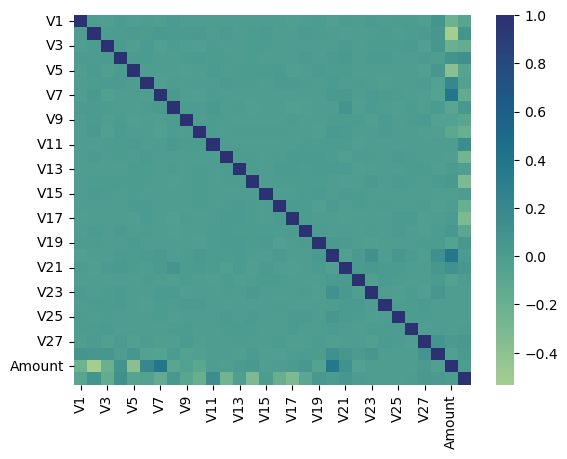

In [6]:
sns.heatmap(df.corr(), cmap="crest");

In [7]:
X = df.drop(columns='Class')
y = df.Class

In [9]:
minmaxscaler = MinMaxScaler()
logreg = LogisticRegression()

In [55]:
X_scaler = minmaxscaler.fit_transform(X)
logreg.fit(X, y)

LogisticRegression()

In [52]:
cv_results = cross_validate(logreg, X_scaler, y, cv=5, 
                            scoring=['max_error',
                                     'r2', 
                                     'neg_mean_absolute_error',
                                     'neg_mean_squared_error',
                                     'accuracy']
                           )
pd.DataFrame(cv_results)

,fit_time,score_time,test_max_error,test_r2,test_neg_mean_absolute_error,test_neg_mean_squared_error,test_accuracy
0,0.088948,0.001997,-1,0.198583,-0.001415,-0.001415,0.998585
1,0.060963,0.001999,-1,0.198583,-0.001415,-0.001415,0.998585
2,0.060963,0.001998,-1,0.098406,-0.001592,-0.001592,0.998408
3,0.058964,0.001999,-1,0.298760,-0.001238,-0.001238,0.998762
4,0.078951,0.001999,-1,-0.001594,-0.001592,-0.001592,0.998408


In [56]:
logreg.score(X, y)

0.9992926613616269

In [57]:
cv_results

{'fit_time': array([0.08894753, 0.06096268, 0.06096268, 0.05896401, 0.07895112]),
 'score_time': array([0.00199723, 0.0019989 , 0.00199842, 0.0019989 , 0.00199866]),
 'test_max_error': array([-1, -1, -1, -1, -1]),
 'test_r2': array([ 0.19858282,  0.19858282,  0.09840567,  0.29875996, -0.00159405]),
 'test_neg_mean_absolute_error': array([-0.00141468, -0.00141468, -0.00159151, -0.00123784, -0.00159151]),
 'test_neg_mean_squared_error': array([-0.00141468, -0.00141468, -0.00159151, -0.00123784, -0.00159151]),
 'test_accuracy': array([0.99858532, 0.99858532, 0.99840849, 0.99876216, 0.99840849])}